### *`Import Libraries for Data Preprocessing and Visualization`*

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [105]:
df = pd.read_csv('logistics_shipments.csv')

df.head()

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days
0,SH10000,Warehouse_MIA,San Francisco,UPS,2023-10-02,2023-10-04,25.7,67.46,Delivered,291,2
1,SH10001,Warehouse_MIA,Atlanta,DHL,2023-12-06,2023-12-09,38.9,268.85,Delivered,1225,3
2,SH10002,Warehouse_LA,Houston,DHL,2023-09-18,2023-09-20,37.2,74.35,Delivered,220,2
3,SH10003,Warehouse_BOS,Seattle,OnTrac,2023-01-26,2023-02-04,42.6,187.04,Delivered,1156,9
4,SH10004,Warehouse_SF,Dallas,OnTrac,2023-06-03,2023-06-06,7.9,120.01,Delivered,1017,3


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shipment_ID       2000 non-null   object 
 1   Origin_Warehouse  2000 non-null   object 
 2   Destination       2000 non-null   object 
 3   Carrier           2000 non-null   object 
 4   Shipment_Date     2000 non-null   object 
 5   Delivery_Date     1968 non-null   object 
 6   Weight_kg         2000 non-null   float64
 7   Cost              1959 non-null   float64
 8   Status            2000 non-null   object 
 9   Distance_miles    2000 non-null   int64  
 10  Transit_Days      2000 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


*`Fix DataTypes`*

In [107]:
# If 'raise', then invalid parsing will raise an exception.
# If 'coerce', then invalid parsing will be set as NaT.
# If 'ignore', then invalid parsing will return the input.

df['Shipment_Date'] = pd.to_datetime(df['Shipment_Date'], errors='coerce')
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], errors='coerce')

df.dtypes

Shipment_ID                 object
Origin_Warehouse            object
Destination                 object
Carrier                     object
Shipment_Date       datetime64[ns]
Delivery_Date       datetime64[ns]
Weight_kg                  float64
Cost                       float64
Status                      object
Distance_miles               int64
Transit_Days                 int64
dtype: object

*`Check missing values`*

In [108]:
df.isnull().sum()

Shipment_ID          0
Origin_Warehouse     0
Destination          0
Carrier              0
Shipment_Date        0
Delivery_Date       32
Weight_kg            0
Cost                41
Status               0
Distance_miles       0
Transit_Days         0
dtype: int64

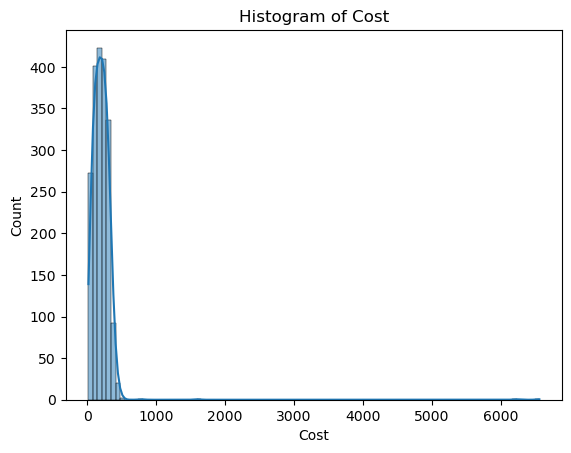

In [109]:
sns.histplot(data=df, x='Cost', bins=100, kde=True)
plt.title('Histogram of Cost')
plt.show()

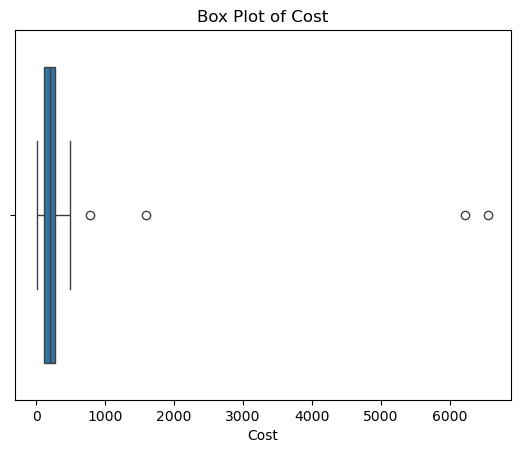

In [110]:
sns.boxplot(data=df, x='Cost')
plt.title("Box Plot of Cost")
plt.show()

- *Right(Positive) Skewed due to outliers -> Fill Missing values with Median*
- *Fill missing dates by Mode, Forward Fill or Backward Fill*

In [111]:
df['Cost'] = df['Cost'].fillna(df['Cost'].median())
df['Delivery_Date'] = df['Delivery_Date'].fillna(df['Delivery_Date'].mode()[0])

df.isna().sum()

Shipment_ID         0
Origin_Warehouse    0
Destination         0
Carrier             0
Shipment_Date       0
Delivery_Date       0
Weight_kg           0
Cost                0
Status              0
Distance_miles      0
Transit_Days        0
dtype: int64

*`Handle Duplicates`*

In [112]:
df.duplicated().sum()

np.int64(0)

*Okay, No Duplicates!*

*`Handle Outliers`*

Number of Outliers in Weight_kg = 111
Clipping......


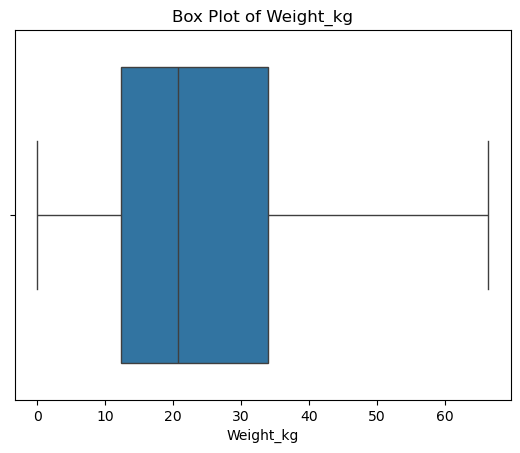

Number of Outliers in Cost = 4
Clipping......


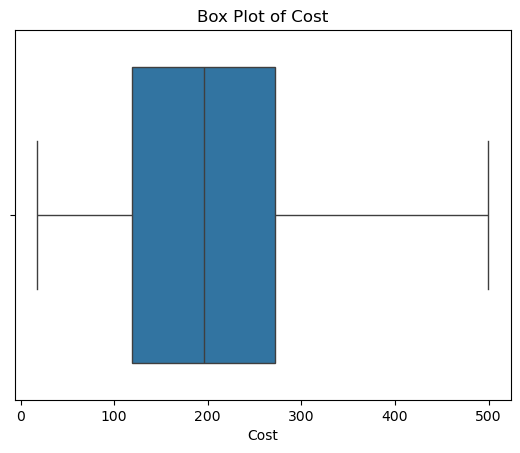

Number of Outliers in Distance_miles = 0
Number of Outliers in Transit_Days = 35
Clipping......


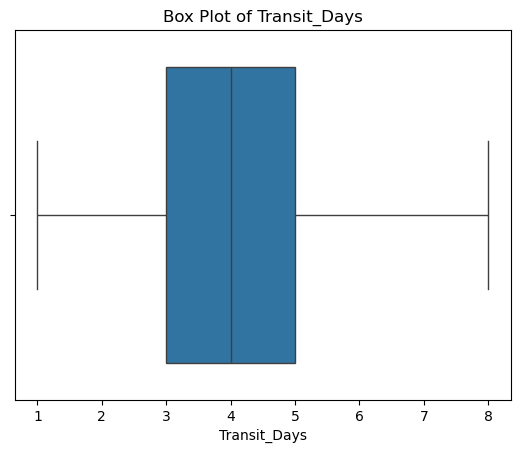

In [113]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = len(df[ (df[col] < lower_bound) | (df[col] > upper_bound)] )
    print(f"Number of Outliers in {col} = {outliers}")
    if outliers > 0:
        # Replace Outliers with Upper/Lower
        print("Clipping......")
        df[col] = df[col].clip(lower_bound, upper_bound)

        sns.boxplot(data=df, x=col)
        plt.title(f'Box Plot of {col}')
        plt.show()

*`Fix category values in Origin_Warehouse column -> Replace Warehouse_ with null`*

In [114]:
df['Origin_Warehouse'].value_counts()

Origin_Warehouse
Warehouse_LA     220
Warehouse_SF     215
Warehouse_HOU    212
Warehouse_ATL    207
Warehouse_MIA    201
Warehouse_CHI    197
Warehouse_DEN    196
Warehouse_BOS    192
Warehouse_SEA    190
Warehouse_NYC    170
Name: count, dtype: int64

In [115]:
df['Origin_Warehouse'] = df['Origin_Warehouse'].apply(lambda x: x.replace('Warehouse_', ''))

df['Origin_Warehouse'].values

array(['MIA', 'MIA', 'LA', ..., 'HOU', 'SEA', 'MIA'], dtype=object)

*`Explore Categorical Values`*

In [116]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"Number of unique values in {col} = {df[col].nunique()}")

Number of unique values in Shipment_ID = 2000
Number of unique values in Origin_Warehouse = 10
Number of unique values in Destination = 15
Number of unique values in Carrier = 7
Number of unique values in Status = 5


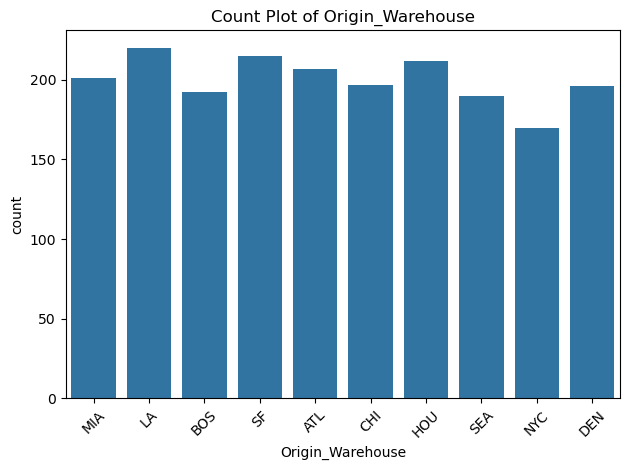

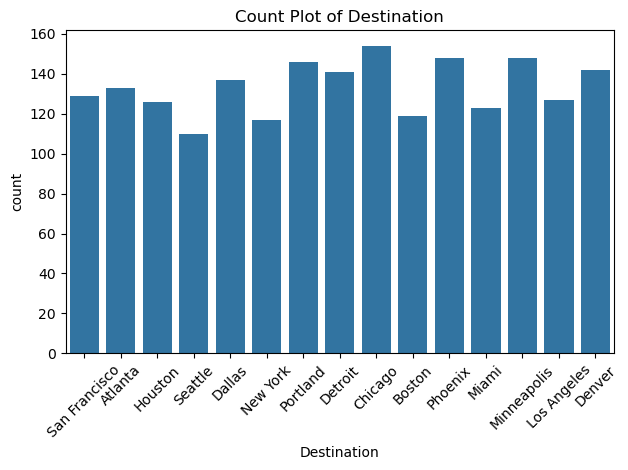

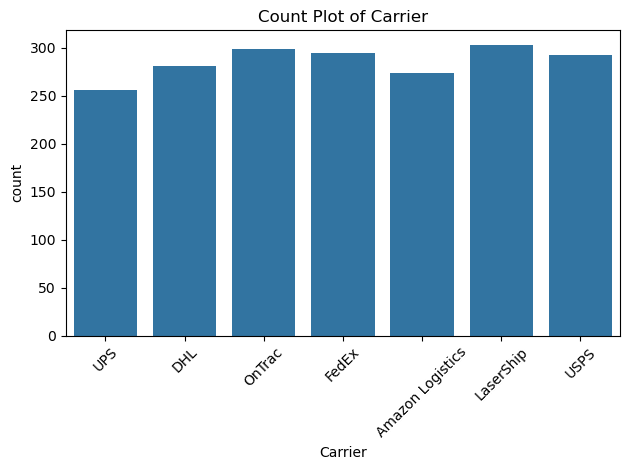

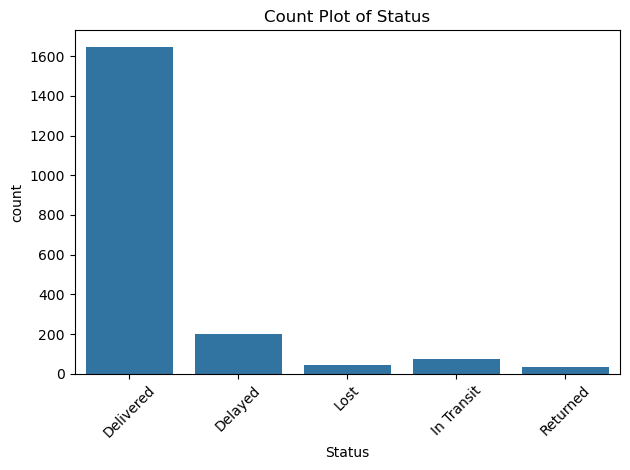

In [117]:
for col in cat_cols:
    if col != 'Shipment_ID':
        sns.countplot(data=df, x=col)
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

*`Drop unused columns`*

In [118]:
df = df.drop(columns=['Shipment_ID'], axis=1)

df.columns

Index(['Origin_Warehouse', 'Destination', 'Carrier', 'Shipment_Date',
       'Delivery_Date', 'Weight_kg', 'Cost', 'Status', 'Distance_miles',
       'Transit_Days'],
      dtype='object')

*`Univariate Analysis`*

*`BIivariate Analysis`*


*`Correlation between Features`*

### *`Import Libraries for prepaing data for modeling and beyond`*

In [140]:
# Split dataset into Training & Testing sets
from sklearn.model_selection import train_test_split, GridSearchCV

# Feature Scaling & Categorical Encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder

# Modeling (Regression)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To save the model
import joblib

*`Split data into Features and Target`*

In [120]:
X = df.drop(columns=['Cost'], axis=1)
y = df['Cost']

*`Training-Testing Split`*

In [121]:
# For Reproducibility
np.random.seed(7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 9), (600, 9), (1400,), (600,))

*`Define the Features that need Scaling, OHE or Target Encoding using Transfomers`*

In [127]:
num_features = ['Weight_kg', 'Distance_miles', 'Transit_Days']
ohe_features = ['Status']
target_features = ['Origin_Warehouse', 'Destination', 'Carrier']

numeric_transformer = Pipeline(steps=[
    ('Scaler', StandardScaler())
])

ohe_transformer = Pipeline(steps=[
    ('OHE', OneHotEncoder(handle_unknown='ignore'))
])

target_transformer = Pipeline(steps=[
    ('Target_Encoder', TargetEncoder())
])

# ------------------
# Column Transformer
# ------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat_ohe', ohe_transformer, ohe_features),
    ('cat_target', target_transformer, target_features)
])

In [128]:
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [137]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    reg = model.named_steps["regressor"]

    if isinstance(reg, RandomForestRegressor):
        print('Random Forest Regressor')
    elif isinstance(reg, DecisionTreeRegressor):
        print('Decision Tree Regressor')
    elif isinstance(reg, LinearRegression):
        print('Linear Regression')

    print(f'R^2 Score: {r2}')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print("-"*30)

In [138]:
models = [rf, dt, lr]
for model in models:
    train_model(model)

Random Forest Regressor
R^2 Score: 0.8595325121762917
Mean Squared Error: 1283.6467633134498
Mean Absolute Error: 20.7884555
------------------------------
Decision Tree Regressor
R^2 Score: 0.7747572882792654
Mean Squared Error: 2058.3558682500006
Mean Absolute Error: 27.800850000000004
------------------------------
Linear Regression
R^2 Score: 0.8665662212536939
Mean Squared Error: 1219.3699827489168
Mean Absolute Error: 20.11244789977008
------------------------------


*`Hyperparameter Tuning`*

In [139]:
param_dt = {
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

param_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [143]:
search_dt = GridSearchCV(estimator=dt, param_grid=param_dt, 
            cv=3, n_jobs=-1, verbose=2, scoring='r2')

search_rf = GridSearchCV(estimator=rf, param_grid=param_rf,
            cv=3, n_jobs=-1, verbose=2, scoring='r2')

In [144]:
search_dt.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


,estimator,Pipeline(step...Regressor())])
,param_grid,"{'regressor__max_depth': [10, 20, ...], 'regressor__min_samples_leaf': [1, 2, ...], 'regressor__min_samples_split': [2, 5, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat_ohe', ...), ...]"


In [146]:
print("Best Score -> ", search_dt.best_score_)
print("Best Parameters -> ", search_dt.best_params_)
print("Best Estimator -> ")
search_dt.best_estimator_

Best Score ->  0.8499309990864218
Best Parameters ->  {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}
Best Estimator -> 


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_ohe', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [147]:
search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


,estimator,Pipeline(step...Regressor())])
,param_grid,"{'regressor__max_depth': [10, 20, ...], 'regressor__min_samples_leaf': [1, 2, ...], 'regressor__min_samples_split': [2, 5, ...], 'regressor__n_estimators': [100, 200]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat_ohe', ...), ...]"


In [149]:
print("Best Score -> ", search_rf.best_score_)
print("Best Parameters -> ", search_rf.best_params_)
print("Best Estimator -> ")
search_rf.best_estimator_

Best Score ->  0.8910485091212039
Best Parameters ->  {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
Best Estimator -> 


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_ohe', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


*`Random Forset Model is the Best -> We will Save it.`*

In [150]:
best_model = search_rf.best_estimator_
joblib.dump(best_model, 'logistics_model.pkl')

['logistics_model.pkl']